In [1]:
import sys
import copy
import time

import numpy as np
import torch
import matplotlib.pyplot as plt

from pygsp import graphs

sys.path.insert(0, '..')
from graph_deep_decoder import datasets as ds
from graph_deep_decoder.architecture import GraphDecoder
from graph_deep_decoder.model import Model
from graph_deep_decoder import utils

SEED = 0
torch.manual_seed(SEED)
np.random.seed(SEED)

## Sensor Network

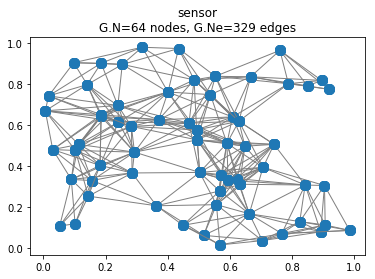

In [2]:
G = graphs.Sensor(64)
A = G.W.todense().astype(int)
G.plot()

K = 3
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H
H2 = H.dot(H.T)

# Compute E[JJ]
# H_norm = H/np.linalg.norm(H)        
H_norm = H/np.linalg.norm(H, axis=0)
H2_norm = H_norm.T.dot(H_norm)
H2_norm[H2_norm>1]=1

#Z = 1-np.arccos(H_norm.dot(H_norm.T))/np.pi
Z = 1-np.arccos(H2_norm)/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H2)

# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

[39.5851844   5.67815597  3.75394092  2.84400044  2.18595803  1.55280901
  1.19321776  0.96140291  0.44569012  0.3925833 ]
[5.6823303  4.10709857 3.5015662  2.23820921 1.63512115 1.24063129
 0.98204894 0.46047577 0.3925833  0.36133878]


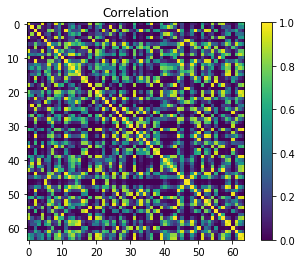

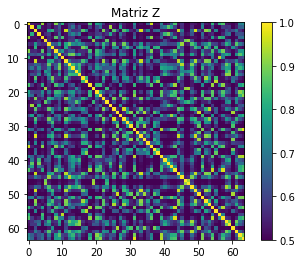

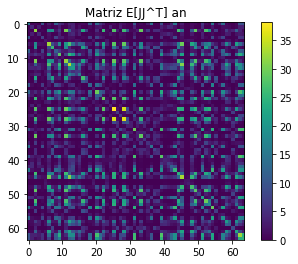

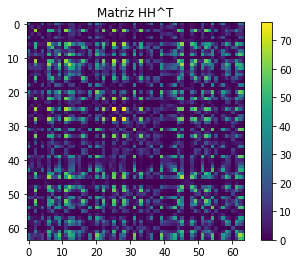

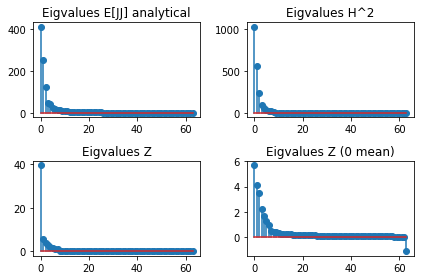

In [3]:
# Plot matrices
plt.figure()
plt.imshow(H2_norm)
plt.colorbar()
plt.title('Correlation')
plt.figure()
plt.imshow(Z)
plt.colorbar()
plt.title('Matriz Z')
plt.figure()
plt.imshow(E_JJ_an)
plt.colorbar()
plt.title('Matriz E[JJ^T] an')
plt.figure()
plt.imshow(H2)
plt.colorbar()
plt.title('Matriz HH^T')

# Compare eigenvalues
plt.figure()
plt.subplot(221)
plt.stem(L_E_JJ_an)
plt.title('Eigvalues E[JJ] analytical')
plt.subplot(222)
plt.stem(L_H**2)
plt.title('Eigvalues H^2')
plt.subplot(223)
plt.stem(L_Z)
plt.title('Eigvalues Z')
plt.subplot(224)
plt.stem(L_Z0)
plt.title('Eigvalues Z (0 mean)')
plt.tight_layout()
print(L_Z[:10])
print(L_Z0[:10])

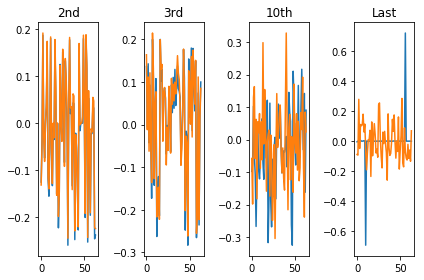

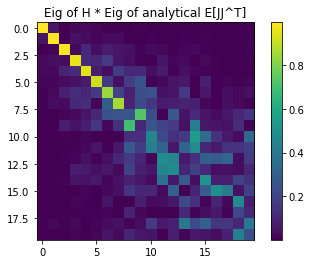

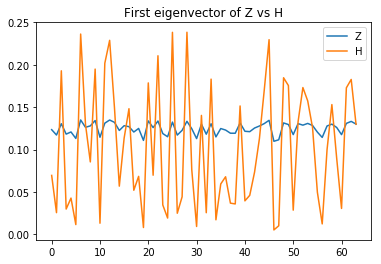

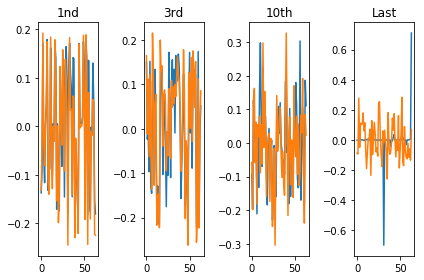

In [4]:
# Plot eigenvectors HH vs JJ
plt.figure()
plt.subplot(141)
plt.plot(V_E_JJ_an[:, 1])
plt.plot(V_H[:,1])
plt.title('2nd')
plt.subplot(142)
plt.plot(V_E_JJ_an[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_E_JJ_an[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_E_JJ_an[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

# Check orthogonality 
k = 20
plt.figure()
plt.imshow(abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k])))
plt.colorbar()
plt.title('Eig of H * Eig of analytical E[JJ^T]')

# Plot eigenvectors
plt.figure()
plt.plot(V_Z[:,0])
plt.plot(V_H[:,0])
plt.legend(['Z','H'])
plt.title('First eigenvector of Z vs H')

plt.figure()
plt.subplot(141)
plt.plot(V_Z[:, 1])
plt.plot(V_H[:,1])
plt.title('2nd')
plt.subplot(142)
plt.plot(V_Z[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_Z[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_Z[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

## Using Zachary's Karate Graph

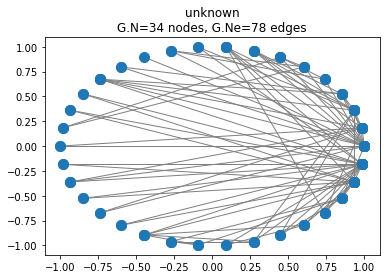

In [5]:
A = np.load('../dataset/karate_Adj.npy')
G = graphs.Graph(A)
G.set_coordinates('ring2D')
G.plot()

K = 3
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H
H2 = H.dot(H.T)

# Compute E[JJ]
H_norm = H/np.linalg.norm(H, axis=0)
H2_norm = H_norm.T.dot(H_norm)
H2_norm[H2_norm>1]=1

Z = 1-np.arccos(H2_norm)/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H2)


# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

C:\Users\reysa\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[23.36863726  3.09923269  1.21068012  0.94437396  0.65158123  0.54563317
  0.37062211  0.35163419  0.32384273  0.30705863]
[3.16088836 1.82049058 1.04587773 0.65250812 0.55110878 0.40077604
 0.35163419 0.34365935 0.31520734 0.28651755]


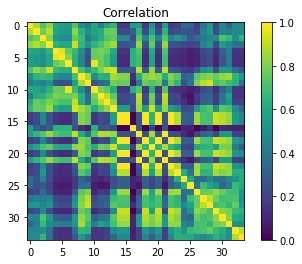

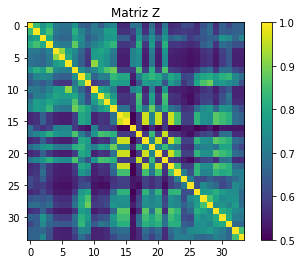

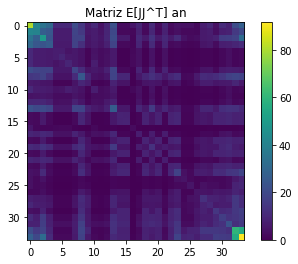

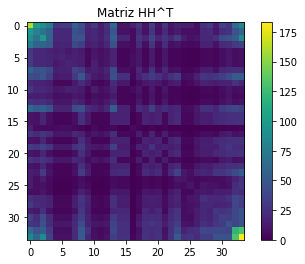

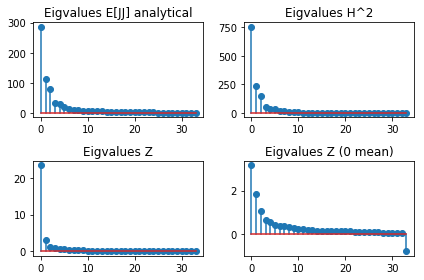

In [6]:
# Plot matrices
plt.figure()
plt.imshow(H2_norm)
plt.colorbar()
plt.title('Correlation')
plt.figure()
plt.imshow(Z)
plt.colorbar()
plt.title('Matriz Z')
plt.figure()
plt.imshow(E_JJ_an)
plt.colorbar()
plt.title('Matriz E[JJ^T] an')
plt.figure()
plt.imshow(H2)
plt.colorbar()
plt.title('Matriz HH^T')

# Compare eigenvalues
plt.figure()
plt.subplot(221)
plt.stem(L_E_JJ_an)
plt.title('Eigvalues E[JJ] analytical')
plt.subplot(222)
plt.stem(L_H**2)
plt.title('Eigvalues H^2')
plt.subplot(223)
plt.stem(L_Z)
plt.title('Eigvalues Z')
plt.subplot(224)
plt.stem(L_Z0)
plt.title('Eigvalues Z (0 mean)')
plt.tight_layout()
print(L_Z[:10])
print(L_Z0[:10])

C:\Users\reysa\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


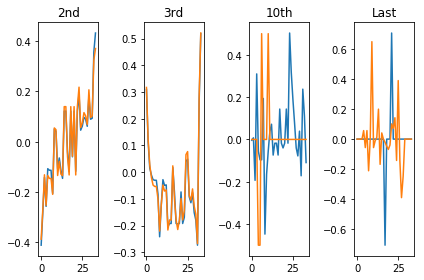

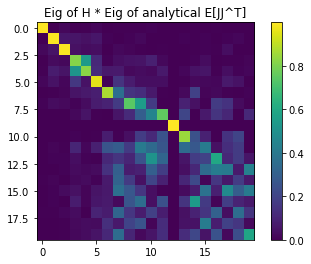

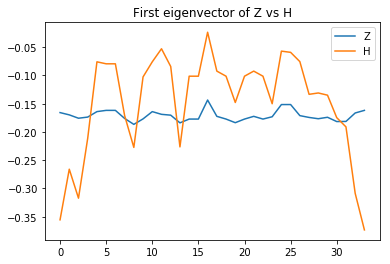

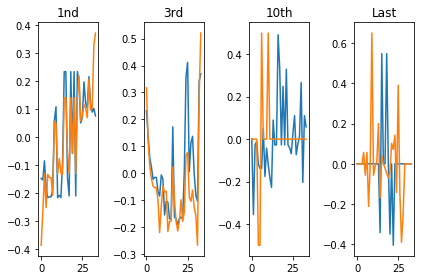

In [7]:
# Plot eigenvectors HH vs JJ
plt.figure()
plt.subplot(141)
plt.plot(V_E_JJ_an[:, 1])
plt.plot(V_H[:,1])
plt.title('2nd')
plt.subplot(142)
plt.plot(V_E_JJ_an[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_E_JJ_an[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_E_JJ_an[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

# Check orthogonality 
k = 20
plt.figure()
plt.imshow(abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k])))
plt.colorbar()
plt.title('Eig of H * Eig of analytical E[JJ^T]')

# Plot eigenvectors
plt.figure()
plt.plot(V_Z[:,0])
plt.plot(V_H[:,0])
plt.legend(['Z','H'])
plt.title('First eigenvector of Z vs H')

plt.figure()
plt.subplot(141)
plt.plot(V_Z[:, 1])
plt.plot(V_H[:,1])
plt.title('1nd')
plt.subplot(142)
plt.plot(V_Z[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_Z[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_Z[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

## Using Minnesota Graph

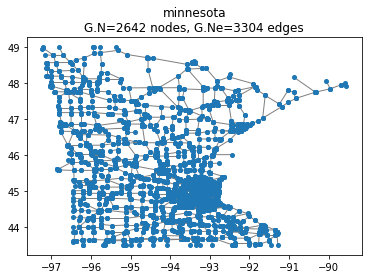

In [8]:
G = graphs.Minnesota()
A = G.W.todense().astype(int)
G.plot()

K = 5
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H
H2 = H.dot(H.T)

# Compute E[JJ]
H_norm = H/np.linalg.norm(H, axis=0)
H2_norm = H_norm.T.dot(H_norm)
H2_norm[H2_norm>1]=1

Z = 1-np.arccos(H2_norm)/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H2)


# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

[1327.88129453    8.35976068    8.12435452    7.82968819    7.7192868
    7.67926073    7.47800354    7.30926212    7.2921104     7.16975848]
[8.38448373 8.12435683 7.83093596 7.71958775 7.68021498 7.4793778
 7.31648248 7.30036099 7.17025342 7.10719537]


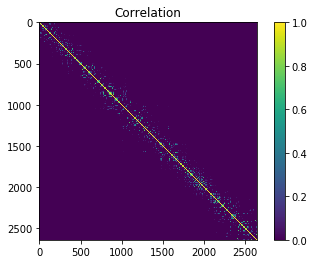

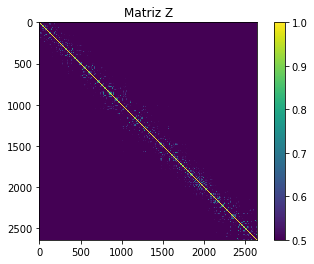

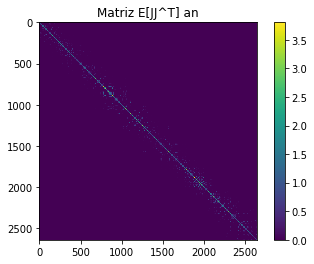

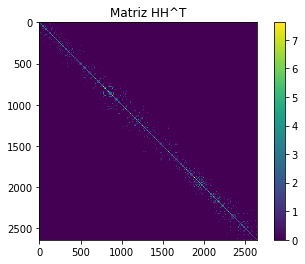

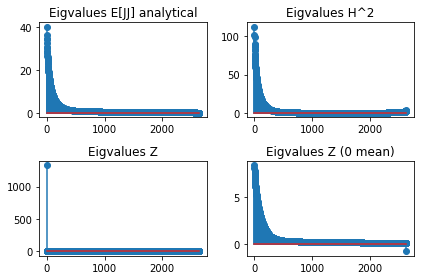

In [9]:
# Plot matrices
plt.figure()
plt.imshow(H2_norm)
plt.colorbar()
plt.title('Correlation')
plt.figure()
plt.imshow(Z)
plt.colorbar()
plt.title('Matriz Z')
plt.figure()
plt.imshow(E_JJ_an)
plt.colorbar()
plt.title('Matriz E[JJ^T] an')
plt.figure()
plt.imshow(H2)
plt.colorbar()
plt.title('Matriz HH^T')

# Compare eigenvalues
plt.figure()
plt.subplot(221)
plt.stem(L_E_JJ_an)
plt.title('Eigvalues E[JJ] analytical')
plt.subplot(222)
plt.stem(L_H**2)
plt.title('Eigvalues H^2')
plt.subplot(223)
plt.stem(L_Z)
plt.title('Eigvalues Z')
plt.subplot(224)
plt.stem(L_Z0)
plt.title('Eigvalues Z (0 mean)')
plt.tight_layout()
print(L_Z[:10])
print(L_Z0[:10])

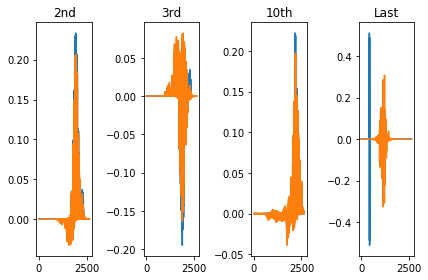

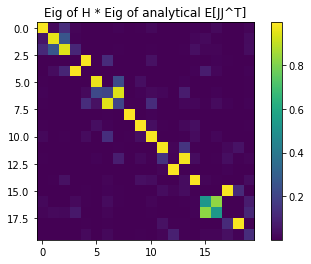

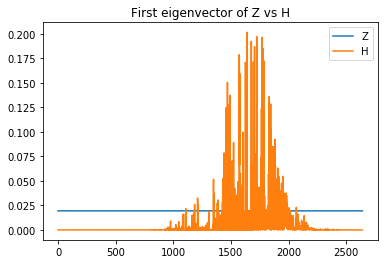

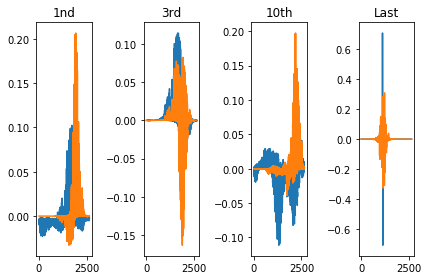

In [10]:
# Plot eigenvectors HH vs JJ
plt.figure()
plt.subplot(141)
plt.plot(V_E_JJ_an[:, 1])
plt.plot(V_H[:,1])
plt.title('2nd')
plt.subplot(142)
plt.plot(V_E_JJ_an[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_E_JJ_an[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_E_JJ_an[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

# Check orthogonality 
k = 20
plt.figure()
plt.imshow(abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k])))
plt.colorbar()
plt.title('Eig of H * Eig of analytical E[JJ^T]')

# Plot eigenvectors
plt.figure()
plt.plot(V_Z[:,0])
plt.plot(V_H[:,0])
plt.legend(['Z','H'])
plt.title('First eigenvector of Z vs H')

plt.figure()
plt.subplot(141)
plt.plot(V_Z[:, 1])
plt.plot(V_H[:,1])
plt.title('1nd')
plt.subplot(142)
plt.plot(V_Z[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_Z[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_Z[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

In [11]:
plt.show()